### NAME: Sofus Krogh Eriksen
### KU: bzk131

#### Exercise 1

In [1]:
import re
import pandas as pd
import requests
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from cleantext import clean
from io import StringIO


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


### Part 1: Regular expression warmup

### A

In [2]:
cpr_pattern = re.compile(r'(\d{2})(\d{2})(\d{2})[-]?(\d{4})')

# Example usage:
cpr_number_1 = '0102031234'
cpr_number_2 = '010203-1234'

In [3]:
test_1 = cpr_pattern.match(cpr_number_1)
test_2 = cpr_pattern.match(cpr_number_2)

if test_1:
    print(fr"Test 1 on {cpr_number_1}.")
    print("Test 1 groups:", test_1.groups())
    day, month, year, identifier = test_1.groups()
    print(f"DD: {day}, MM: {month}, YY: {year}, IIII: {identifier}")

if test_2:
    print(fr"Test 2 on {cpr_number_2}.")
    day, month, year, identifier = test_2.groups()
    print(f"DD: {day}, MM: {month}, YY: {year}, IIII: {identifier}")

Test 1 on 0102031234.
Test 1 groups: ('01', '02', '03', '1234')
DD: 01, MM: 02, YY: 03, IIII: 1234
Test 2 on 010203-1234.
DD: 01, MM: 02, YY: 03, IIII: 1234


### B

In [4]:
def cpr_century(cpr):
    cpr_pattern = re.compile(r'(\d{2})(\d{2})(\d{2})[-]?(\d{4})')
    match = cpr_pattern.match(cpr)

    if match:
        day, month, year, identifier = match.groups()
        identifier = int(identifier)
        year = int(year)

        if 1 <= identifier <= 3999:
            century = 1900 + year // 100
        elif 4000 <= identifier <= 4999 and 0 <= year <= 36:
            century = 2000 + year // 100
        elif 4000 <= identifier <= 4999 and 37 <= year <= 99:
            century = 1900 + year // 100
        elif 5000 <= identifier <= 8999 and 0 <= year <= 57:
            century = 2000 + year // 100
        elif 5000 <= identifier <= 8999 and 58 <= year <= 99:
            century = 1800 + year // 100
        elif 9000 <= identifier <= 9999 and 0 <= year <= 36:
            century = 2000 + year // 100
        elif 9000 <= identifier <= 9999 and 37 <= year <= 99:
            century = 1900 + year // 100
        else:
            raise ValueError("Invalid identifier or year range")
        
        return century
    else:
        raise ValueError("Invalid CPR format")




In [5]:
cpr_lst = ['220197-8989', '2201650099', '121201-0976', '1224230973', '010124-9001']

In [6]:
for cpr in cpr_lst:
    result = cpr_century(cpr)
    result_type = type(result)
    print(f'CPR:{cpr} is born in the {result}. The type of the result is: {result_type}')


CPR:220197-8989 is born in the 1800. The type of the result is: <class 'int'>
CPR:2201650099 is born in the 1900. The type of the result is: <class 'int'>
CPR:121201-0976 is born in the 1900. The type of the result is: <class 'int'>
CPR:1224230973 is born in the 1900. The type of the result is: <class 'int'>
CPR:010124-9001 is born in the 2000. The type of the result is: <class 'int'>


### Part 2: Processing the FakeNewsCorpus data set

In [7]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'

# Fetching the content from the URL
response = requests.get(url)

# Checking if the request was successful (status code 200)
if response.status_code == 200:
    # Reading CSV data using pandas
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)

    # Displaying the first few rows of the DataFrame
    #print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


In [8]:
df.head(10)

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN
5,5,899,blackagendareport.com,unreliable,https://blackagendareport.com/articlelist/Medi...,“Republicans and Democrats alike are willing t...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Black Agenda Report,"Margaret Kimberley, Bar Editor, Senior Columni...",NaN,[''],NaN,NaN,NaN
6,6,1058,awarenessact.com,conspiracy,http://awarenessact.com/tag/waking-up-in-the-m...,Could you imagine waking up in the morgue? I f...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,waking up in the morgue – Awareness Act,Gerald Sinclair,NaN,[''],NaN,NaN,NaN
7,7,1376,beforeitsnews.com,fake,http://beforeitsnews.com/home/featuredlist/v2_...,Citizen Journalist\n\nby N.Morgan Q has releas...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Citizen Journalist,NaN,NaN,[''],NaN,NaN,NaN
8,8,1411,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2018/01/usa-d...,Usa Dollar Tanks On Mnuchin Statement That He ...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Usa Dollar Tanks On Mnuchin Statement That He ...,NaN,NaN,[''],NaN,NaN,NaN
9,9,1422,canadafreepress.com,conspiracy,http://canadafreepress.com/article/its-not-rea...,Subscribe to Canada Free Press for FREE\n\nNei...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,It’s Not Really President Trump Who Needs His ...,"Judi Mcleod, Because Without America, There Is...",NaN,[''],NaN,NaN,NaN


In [9]:
# Get info from dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        250 non-null    int64  
 1   id                250 non-null    int64  
 2   domain            250 non-null    object 
 3   type              238 non-null    object 
 4   url               250 non-null    object 
 5   content           250 non-null    object 
 6   scraped_at        250 non-null    object 
 7   inserted_at       250 non-null    object 
 8   updated_at        250 non-null    object 
 9   title             250 non-null    object 
 10  authors           170 non-null    object 
 11  keywords          0 non-null      float64
 12  meta_keywords     250 non-null    object 
 13  meta_description  54 non-null     object 
 14  tags              27 non-null     object 
 15  summary           0 non-null      float64
dtypes: float64(2), int64(2), object(12)
memory u

### Datainspection

There a multiple all null columns. #11 and #15 are completly empty, and others are partly empty, ie. missing data. 


**Missing Values:**

The 'authors', 'keywords', 'meta_keywords', 'meta_description', and 'tags' columns contain empty lists ('[]'), which may imply missing or incomplete information.
Date Representation:

The 'scraped_at', 'inserted_at', and 'updated_at' columns seem to contain timestamp values. OIt is importtant to ensure that these columns are correctly parsed as datetime objects if used.

**Text Data Cleaning:**

The 'content' column contains HTML tags, line breaks, and special characters. Depending on the analysis chosen, one might want to clean or preprocess the text data to remove HTML tags and unnecessary characters.
Categorical Values:

The 'type' column appears to categorize news into 'unreliable' and 'fake.' One must ensure that these categories are well-defined and consistent throughout the dataset.

**Column Names:**

Some column names contain spaces, which might cause inconvenience in handling them. I could consider renaming columns for ease of use later.

**Encoding Issues:**

The 'title' column does not contain duplicate entries, as each news article should have a unique title.

**Column Data Types:**

Confirm that each column has the correct data type. For example, 'type' might be categorical, 'scraped_at,' 'inserted_at,' and 'updated_at' should be datetime, etc.

In [10]:
def clean_text(raw_text):
   cleaned_text = re.sub(r'\s+', ' ', raw_text)

   # Replace uppercase letters with lowercase
   cleaned_text = re.sub(r'[A-Z]', lambda match: match.group().lower(), cleaned_text)
   
   cleaned_text = re.sub(r'\b\d+\b', '<NUM>', cleaned_text)
   cleaned_text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '<EMAIL>', cleaned_text)
   cleaned_text = re.sub(r'https?://\S+', '<URL>', cleaned_text)
   cleaned_text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '<DATE>', cleaned_text)


   return cleaned_text


In [11]:
# Creating new column with the cleaned text
df['content_1'] = df['content'].apply(clean_text)


In [12]:
def clean_text_with_library(raw_text):
    # Use clean-text library for text cleaning
    cleaned_text = clean(
        raw_text,
        fix_unicode=True,
        to_ascii=True,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_numbers=True,            
        no_digits=True,             
        no_punct=True,             
        replace_with_url="<URL>",
        replace_with_email="<EMAIL>",
        replace_with_number="<NUM>",
        replace_with_digit="<NUM>"
    )
    cleaned_text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '<DATE>', cleaned_text)

    return cleaned_text




In [13]:
# Creating another new column with the cleaned text with the library
df['content_2'] = df['content'].apply(clean_text_with_library)


### Part 3: Descriptive frequency analysis of the data

In [14]:
# Tokenize text and calculate unique words before preprocessing
raw_text_words = set(word_tokenize(' '.join(df['content'])))
num_unique_words_raw = len(raw_text_words)

# Tokenize cleaned text and calculate unique words after preprocessing
cleaned_text_words = set(word_tokenize(' '.join(df['content_2'])))
num_unique_words_cleaned = len(cleaned_text_words)

# Display the results
print("Number of unique words before preprocessing:", num_unique_words_raw)
print("Number of unique words after preprocessing:", num_unique_words_cleaned)

Number of unique words before preprocessing: 20948
Number of unique words after preprocessing: 16499


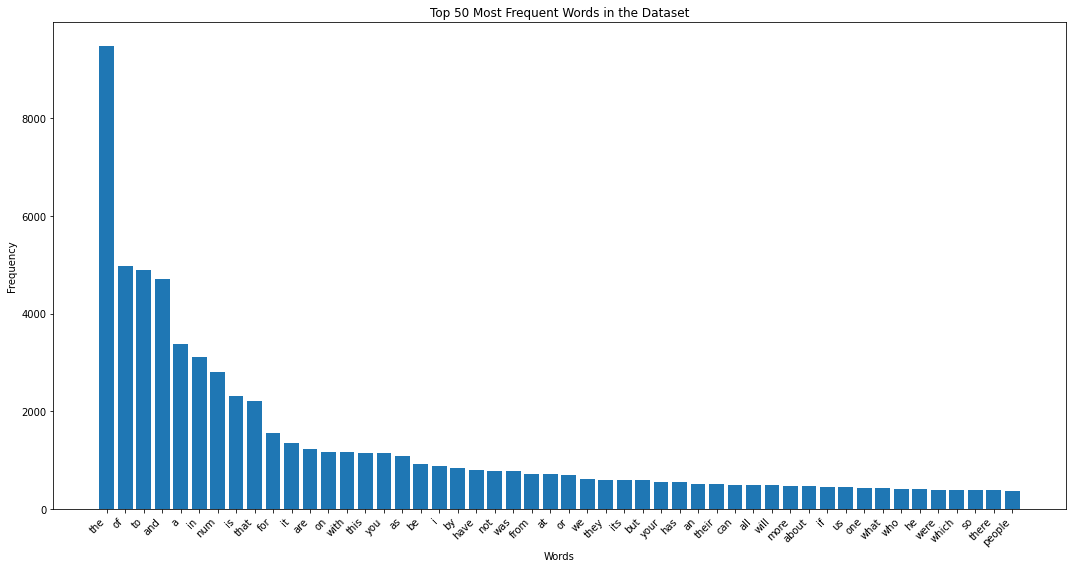

In [15]:
raw_text = ' '.join(df['content_2'])

words = [word.lower() for word in word_tokenize(raw_text) if word.isalnum()]

# Calculate word frequencies
freq_dist = FreqDist(words)

# Calculate word frequencies
freq_dist = FreqDist(words)

# Get the 50 most frequent words
top_words = freq_dist.most_common(50)

# Create a DataFrame for plotting
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plot the barplot
plt.figure(figsize=(15, 8))
plt.bar(df_top_words['Word'], df_top_words['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words in the Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [16]:
df.head(10)

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,content_1,content_2
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN,sometimes the power of christmas will make you...,sometimes the power of christmas will make you...
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN,awakening of <NUM> strands of dna – “reconnect...,awakening of <num> strands of dna reconnecting...
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN,never hike alone: a friday the 13th fan film u...,never hike alone a friday the <num><num>th fan...
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN,"when a rare shark was caught, scientists were ...",when a rare shark was caught scientists were l...
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN,donald trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...
5,5,899,blackagendareport.com,unreliable,https://blackagendareport.com/articlelist/Medi...,“Republicans and Democrats alike are willing t...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Black Agenda Report,"Margaret Kimberley, Bar Editor, Senior Columni...",NaN,[''],NaN,NaN,NaN,“republicans and democrats alike are willing t...,republicans and democrats alike are willing to...
6,6,1058,awarenessact.com,conspiracy,http://awarenessact.com/tag/waking-up-in-the-m...,Could you imagine waking up in the morgue? I f...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,waking up in the morgue – Awareness Act,Gerald Sinclair,NaN,[''],NaN,NaN,NaN,could you imagine waking up in the morgue? i f...,could you imagine waking up in the morgue i fo...
7,7,1376,beforeitsnews.com,fake,http://beforeitsnews.com/home/featuredlist/v2_...,Citizen Journalist\n\nby N.Morgan Q has releas...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Citizen Journalist,NaN,NaN,[''],NaN,NaN,NaN,citizen journalist by n.morgan q has released ...,citizen journalist by nmorgan q has released s...
8,8,1411,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2018/01/usa-d...,Usa Dollar Tanks On Mnuchin Statement That He ...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Usa Dollar Tanks On Mnuchin Statement That He ...,NaN,NaN,[''],NaN,NaN,NaN,usa dollar tanks on mnuchin statement that he ...,usa dollar tanks on mnuchin statement that he ...
9,9,1422,canadafreepress.com,conspiracy,http://canadafreepress.com/article/its-not-rea...,Subscribe to Canada Free Press for FREE\n\nNei...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,It’s Not Really President Trump Who Nee